In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
%matplotlib inline
from pylab import rcParams
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
class Reader:
    def __init__(self, path = "python-intro/Hometask/df_nashdomrf.pkl"):
        ! git clone https://github.com/4vel/python-intro.git
        self.df = pd.read_pickle(path)

class Saver:
    def __init__(self, df):
        self.df = df

    def save_excel (self):
        self.df.to_excel('dom.xlsx', index=False)

    def save_pickle (self):
        self.df.to_pickle('dom.pkl')

    def save_sql (self):
        import sqlite3
        conn = sqlite3.connect('db')
        self.df.applymap(str).to_sql('dom', conn, if_exists='replace', index = False)
        conn.commit()
        conn.close()

In [13]:
r = Reader()
s = Saver(r.df)
s.save_excel()
s.save_pickle()
s.save_sql()

fatal: destination path 'python-intro' already exists and is not an empty directory.


In [32]:
class Plotter:
    def __init__(self, data):
        self.df = data[(data['region'] == 77) | (data['region'] == 23)]
        self.df['ready_dt'] = pd.to_datetime(self.df.objReady100PercDt)
        self.df = self.df.drop(['developer.devId','developer.devShortCleanNm','developer.devShortNm','developer.devFullCleanNm','developer.problObjCnt','developer.buildObjCnt','developer.comissObjCnt','developer.regRegionDesc','developer.devPhoneNum','developer.devSite','developer.devEmail','developer.devInn','developer.devOgrn','developer.devKpp','developer.devLegalAddr','developer.devFactAddr','developer.lastRpdId','developer.fundGuarantyFlg','developer.devOrgRegRegionCd','developer.devEmplMainFullNm','developer.developerGroupName','developer.orgForm.id','developer.orgForm.fullForm','developer.orgForm.shortForm','developer.companyGroupId','developer.objGuarantyEscrowFlg',
         'developer.govFundFlg', 'objReady100PercDt', 'loadDttm', 'address', 'rpdPdfLink', 'objectTransportInfo', 'miniUrl', 'rpdNum', 'photoRenderDTO', 'generalContractorNm', 'nameObj', 'objLkLatitude', 'objLkSaleDepEmail', 'objLkLongitude', 'developer.bankruptStage.bankruptStageCd', 'developer.bankruptStage.bankruptStageDesc', 'developer.bankruptStage.bankruptLawUrl', 'developer.orgBankruptMsgDttm', 'metro.id', 'metro.name', 'metro.line', 'metro.color', 'metro.time', 'metro.isWalk', 'metro.colors', 'complexShortNm'], axis=1)
        self.df['ready_year'] = pd.to_datetime(self.df['ready_dt']).dt.strftime('%Y')

    def show_mean(self, group = 'region', col = 'objPriceAvg'):
        df_mean = self.df.groupby(group)[col].mean()
        rcParams['figure.figsize'] = 10,2
        df_mean.plot(kind='barh')
        plt.show()

    def show_count(self, group = ['region'], col = 'id'):
        df_houses = self.df.groupby(by = group)[col].count().sort_values(ascending=True)
        rcParams['figure.figsize'] = 10,2
        df_houses.plot(kind='barh')
        plt.show()

<ipython-input-32-8237dd529d92>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['ready_dt'] = pd.to_datetime(self.df.objReady100PercDt)


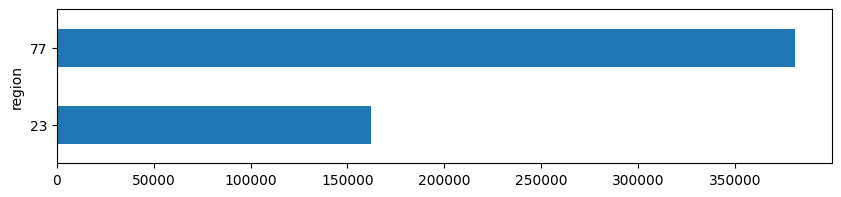

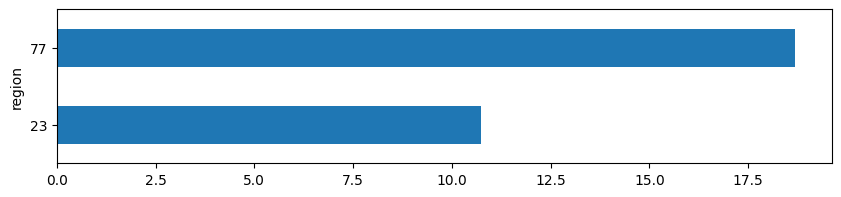

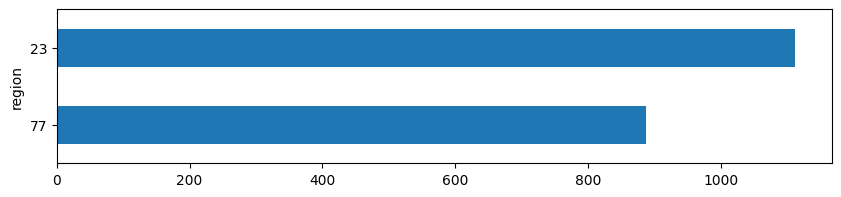

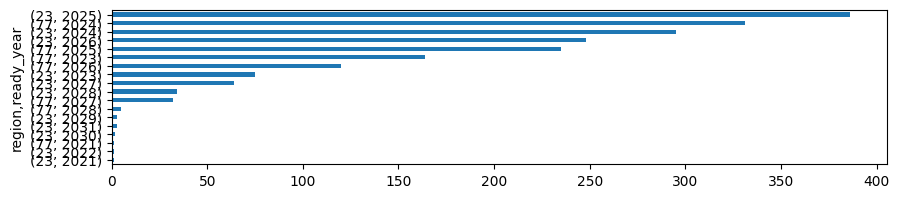

In [33]:
p = Plotter(r.df)
p.show_mean()
p.show_mean(col = 'floorMax')
p.show_count()
p.show_count(group = ['region', 'ready_year'])